In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Theta(using batch gd):  0.0009014116620464372, 0.9996034674627353
Theta(using stochastic gd):  3.816981057681375e-09, 0.9999999983559124
Predicted values(using batch gd): 7.997729151363929, 8.997332618826663, 9.996936086289399
Predicted values(using stochastic gd): 7.99999999066428, 8.999999989020191, 9.999999987376103


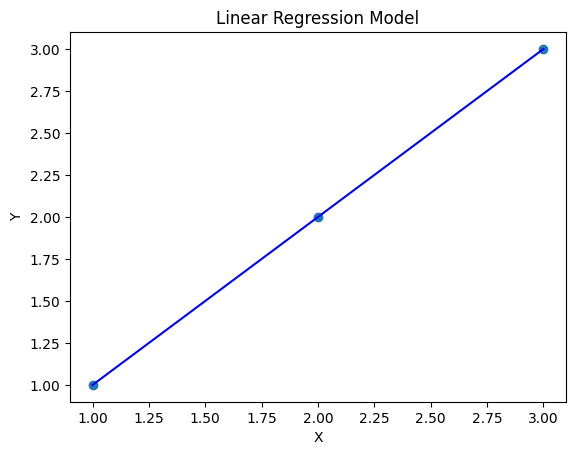

In [40]:
X = [[1], [2], [3]]
Y = [[1], [2], [3]]


X = np.array(X)
Y = np.array(Y)
theta = np.zeros((2, 1)) # bias, parameter-weight

x_b = np.c_[np.ones((X.shape[0], 1)), X] # adding default x0


m = len(Y) # no of training sets
n = len(X) # no of features or parameters or inputs
alpha = 0.01
iterations = 5000

def batch_gradient_descent(x, y, theta, alpha, iterations):
    for _ in range(iterations):
        descent = (1/m) * x.T.dot(x.dot(theta) - y)
        theta = theta - alpha * descent
    
    return theta

def stochastic_gradient_descent(x, y, theta, alpha, iterations):
    for _ in range(iterations):
        for i in range(len(y)):
            xi = x[i].reshape(1, -1)
            yi = y[i]
            error = xi.dot(theta) - yi
            theta = theta - alpha * xi.T.dot(error)
    return theta 

#Fitting of values
theta_final_batch = batch_gradient_descent(x=x_b, y=Y, theta=theta, alpha=alpha, iterations=iterations)
theta_final_stochastic = stochastic_gradient_descent(x=x_b, y=Y, theta=theta, alpha=alpha, iterations=iterations)
print("Theta(using batch gd): ", ", ".join(map(str, theta_final_batch.flatten())))
print("Theta(using stochastic gd): ", ", ".join(map(str, theta_final_stochastic.flatten())))

#Prediction on new values
new_x = np.array([[8], [9], [10]])
new_x_b = np.c_[np.ones((new_x.shape[0], 1)), new_x]
prediction_batch = new_x_b.dot(theta_final_batch)
prediction_stoch = new_x_b.dot(theta_final_stochastic)
print("Predicted values(using batch gd):", ", ".join(map(str, prediction_batch.flatten())))
print("Predicted values(using stochastic gd):", ", ".join(map(str, prediction_stoch.flatten())))

#Visualization of fitted line
plt.scatter(X, Y)
plt.plot(X, x_b.dot(theta_final_stochastic), color='blue')
plt.title("Linear Regression Model")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


